In [29]:
%matplotlib qt
import importlib
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
sys.path.append("..")       # to make the upper folder visible
import src
_ = importlib.reload(src)   # this make changes in the src package immediately effective without restarting the kernel

# folder path
dirPath = "../data/raw/1st_test_IMSBearing/"
indx=0
fileList=[]
for fileName in os.listdir(dirPath):
    # check if current path is a file
    if os.path.isfile(os.path.join(dirPath, fileName)):
        fileList.append(fileName)
        snap=src.data.snapshot()
        snap.readImsFile(path=dirPath+fileName, variables="Bearing 1 x")
        # ax=snap.rawData.plot(x='time',y='Bearing 1 x',legend=False)
        # ax.grid(which='major',axis='both',color='grey', linestyle='-')
        # ax.grid(which='minor',axis='both',color='grey', linestyle=':')
        # ax.minorticks_on()
        # plt.figure(clear=True)

        # Frequency domain analisys
        samplFreq=20000 #hz
        y=snap.rawData["Bearing 1 x"].to_numpy()
        tpCount     = len(y)
        fourierTransform = np.fft.fft(y)/len(y)           # Normalize amplitude
        FFT=abs(fourierTransform[range(int(len(y)/2))])
        if indx==0:
            freqAnaly=FFT
        else:
            freqAnaly = np.vstack([freqAnaly, FFT])       # Exclude sampling frequency
        values      = np.arange(int(tpCount/2))
        timePeriod  = tpCount/samplFreq
        FFTfrequencies = values/timePeriod
        indx+=1



In [25]:
print(freqAnaly.shape)
print(freqAnaly[:,80])


(20, 10240)
[4.48560699e-05 6.39182865e-04 1.01208743e-04 2.93947609e-04
 2.31251543e-04 1.74274154e-04 5.34356175e-04 2.43439073e-04
 4.72356886e-04 1.97453444e-04 1.97845549e-04 3.20396746e-04
 1.13598761e-04 1.25065835e-04 2.34259260e-04 2.88509098e-04
 4.68615141e-04 1.95396161e-04 3.71453948e-04 2.77471483e-04]


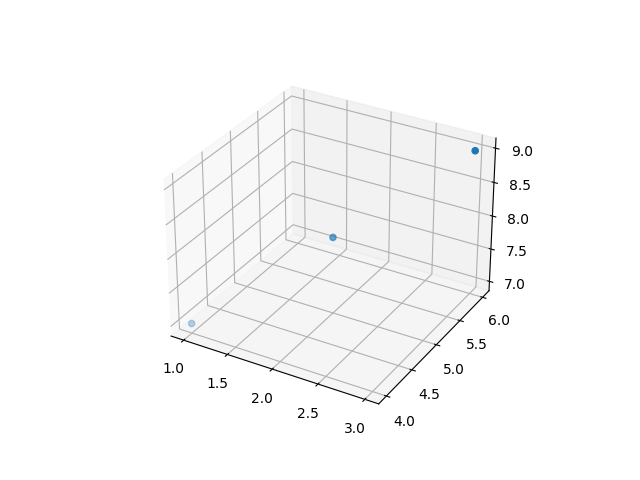

In [26]:


ax=plt.axes(projection='3d')
ax.scatter3D([1,2,3],[4,5,6],[7,8,9])
plt.show()

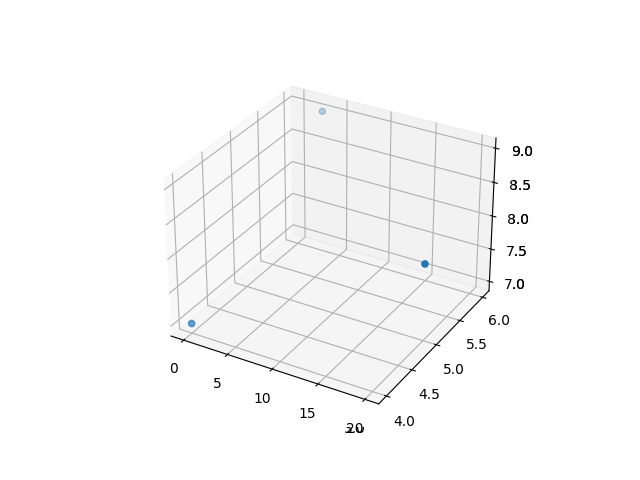

In [27]:
ax=plt.axes(projection='3d')
ax.scatter3D([0,20,3],[4,5,6],[7,8,9])
plt.show()

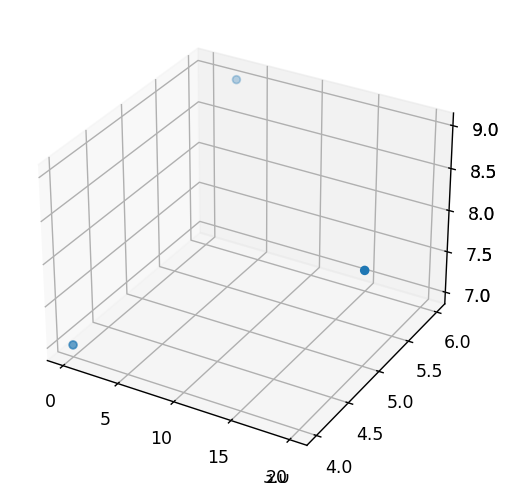

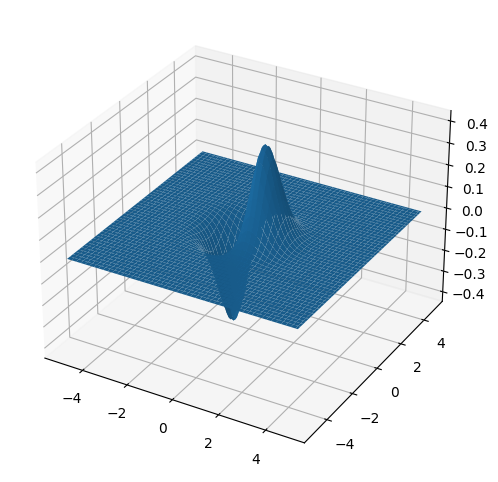

In [28]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
#if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, Z)


plt.show()